<a href="https://colab.research.google.com/github/Taha533/Iris-Flower-Prediction-98-Accuracy-/blob/master/cifar10_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 49kB/s 
     |████████████████████████████████| 501kB 45.0MB/s 
     |████████████████████████████████| 4.3MB 54.4MB/s 


In [3]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [6]:
print(tf.__version__)

2.0.0-rc0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [8]:
from tensorflow.keras.datasets import cifar10

In [9]:
(X_train,y_train), (X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
classes_name = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
X_train.max()

255

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

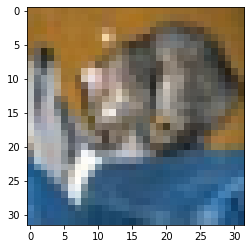

In [16]:
plt.imshow(X_test[0])

In [17]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Building CNN

In [21]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding= 'same', activation='relu',input_shape=[32,32,3]))


model.add(Conv2D(filters=32,kernel_size=(3,3),padding= 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128,activation='relu',))
model.add(Dense(units = 10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [23]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics= ['sparse_categorical_accuracy'])

In [24]:
history = model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 180s 4ms/sample - loss: 1.4069 - sparse_categorical_accuracy: 0.4968 - val_loss: 1.1274 - val_sparse_categorical_accuracy: 0.6024
Epoch 2/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 1.0968 - sparse_categorical_accuracy: 0.6131 - val_loss: 0.9962 - val_sparse_categorical_accuracy: 0.6487
Epoch 3/10
50000/50000 [==============================] - 177s 4ms/sample - loss: 0.9828 - sparse_categorical_accuracy: 0.6517 - val_loss: 0.9491 - val_sparse_categorical_accuracy: 0.6639
Epoch 4/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 0.8952 - sparse_categorical_accuracy: 0.6827 - val_loss: 0.9115 - val_sparse_categorical_accuracy: 0.6823
Epoch 5/10
50000/50000 [==============================] - 178s 4ms/sample - loss: 0.8266 - sparse_categorical_accuracy: 0.7086 - val_loss: 0.9427 - val_sparse_categorical_accuracy: 0.6720
Epoch 6/10

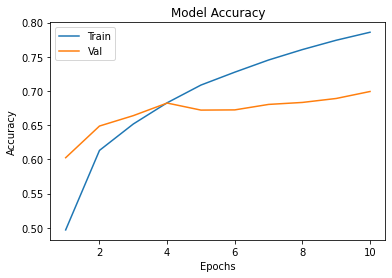

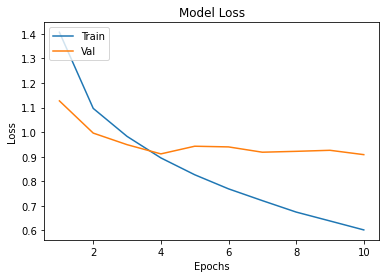

In [25]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history["sparse_categorical_accuracy"])
plt.plot(epoch_range,history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc ="upper left")
plt.show()

plt.plot(epoch_range,history.history["loss"])
plt.plot(epoch_range,history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Val"],loc ="upper left")
plt.show()



In [26]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [27]:
y_pred = model.predict_classes(X_test)

In [28]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [30]:
mat = confusion_matrix(y_test,y_pred)

In [31]:
mat

array([[775,  15,  34,  15,  12,   3,   8,  14,  66,  58],
       [ 24, 786,   4,   6,   2,   3,   5,   2,  32, 136],
       [101,   8, 469,  64, 100,  77,  92,  54,  15,  20],
       [ 41,  18,  59, 423,  79, 198,  84,  40,  20,  38],
       [ 26,   7,  47,  56, 655,  30,  76,  81,  13,   9],
       [ 19,   5,  38, 156,  49, 614,  33,  64,  12,  10],
       [  7,   8,  31,  42,  32,  20, 834,   6,   8,  12],
       [ 19,   7,  22,  25,  54,  64,   9, 767,   9,  24],
       [ 71,  40,   4,   8,   7,   5,   1,   2, 823,  39],
       [ 29,  71,   5,   4,   3,   1,   2,  11,  28, 846]])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3358f47080>)

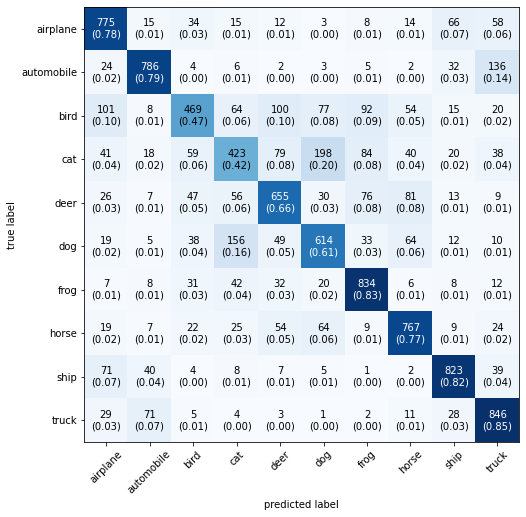

In [33]:
plot_confusion_matrix(mat,figsize=(8,8),class_names=classes_name,show_normed=True)